### Capítulo 16: Aprendizado por reforço

O Capítulo 16, intitulado "**Aprendizagem por Reforço**" (Reinforcement Learning - RL), apresenta este campo do Machine Learning como um dos mais empolgantes e antigos.

### Introdução à Aprendizagem por Reforço (RL)

A **RL** visa criar **agentes** capazes de agir em um **ambiente** para maximizar **recompensas** ao longo do tempo. O campo existe desde a década de 1950, mas ganhou destaque em 2013, quando pesquisadores da DeepMind demonstraram um sistema que podia aprender a jogar praticamente qualquer jogo de Atari usando apenas pixels brutos como entrada. Em março de 2016, o sistema AlphaGo da DeepMind derrotou o campeão mundial de Go, Lee Sedol, marcando um avanço significativo. A chave para esses sucessos foi a aplicação do **Deep Learning** à RL.

### Conceitos Fundamentais da RL

*   **Agente e Ambiente**
    Um **agente** é o sistema de software que observa o **ambiente**, escolhe e executa **ações**, e recebe **recompensas** ou **penalidades**. O ambiente, por sua vez, recebe as ações do agente e reage, produzindo novas observações e uma recompensa (ou sua ausência).

*   **Observações, Ações e Recompensas**
    O ambiente reage às ações do agente, fornecendo novas **observações** e uma **recompensa** (positiva, negativa ou zero). O objetivo do agente é aprender uma **política** que o ajude a selecionar ações que maximizem as recompensas ao longo do tempo.

*   **Aplicações**
    Exemplos incluem robôs (que implementam algoritmos de **Aprendizagem por Reforço** para aprender a andar), jogos (como Ms. Pac-Man e Go), termostatos, sistemas de trading automático, carros autônomos e posicionamento de anúncios em páginas da web.

### Busca por Políticas (Policy Search)

A **política** é o algoritmo que o agente usa para determinar suas ações. Pode ser, por exemplo, uma rede neural que recebe observações como entrada e produz uma ação.
Existem diferentes abordagens para a busca de políticas:
*   **Algoritmos Genéticos**: Mantêm uma população de políticas, as avaliam, e permitem que as melhores se reproduzam e evoluam.
*   **Técnicas de Otimização**: Avaliam os gradientes das recompensas em relação aos parâmetros da política e ajustam esses parâmetros para buscar recompensas mais altas (ascensão de gradiente). Esta abordagem é conhecida como **gradientes de política (policy gradients - PG)**.

### OpenAI Gym

É um kit de ferramentas que fornece ambientes de simulação para o desenvolvimento e comparação de algoritmos de RL. Permite criar um ambiente (ex: `gym.make("CartPole-v0")`), reiniciá-lo (`env.reset()`), renderizá-lo (`env.render()`), consultar as ações possíveis (`env.action_space`) e executar uma ação (`env.step(action)`). O capítulo usa o ambiente **CartPole** como exemplo, onde um carrinho deve equilibrar um poste.

### Políticas de Rede Neural

Uma política pode ser implementada como uma **rede neural** que recebe observações e produz a probabilidade de cada ação possível. Em vez de escolher a ação com a maior probabilidade, muitas vezes é escolhida uma ação aleatória com base nessas probabilidades, permitindo um equilíbrio entre **exploração** (tentar novas ações) e **explotação** (usar ações conhecidas por serem boas). Para o ambiente CartPole, que tem duas ações, usa-se um neurônio de saída com ativação logística; para mais ações, usa-se softmax.

### Avaliando Ações: O Problema de Atribuição de Crédito (Credit Assignment Problem)

O problema surge porque as recompensas em RL são frequentemente esparsas e atrasadas, dificultando saber quais ações específicas contribuíram para um resultado. A solução comum é avaliar uma ação com base na soma de todas as recompensas que vêm depois dela, aplicando uma **taxa de desconto** (`discount_rate`) a cada passo futuro. Uma taxa de desconto próxima de 0 valoriza recompensas imediatas, enquanto uma próxima de 1 valoriza recompensas futuras quase tanto quanto as imediatas. Ações com pontuação negativa são consideradas ruins, e as com pontuação positiva são consideradas boas.

### Gradientes de Política (PG)

O algoritmo PG treina a rede neural diretamente para produzir ações que maximizam as recompensas. O processo geralmente envolve:
1.  A rede neural calcula as probabilidades de ação.
2.  O agente executa episódios, coletando recompensas e gradientes.
3.  As recompensas são descontadas e normalizadas.
4.  Os vetores de gradiente são multiplicados pelas pontuações das ações (positivas para boas ações, negativas para ruins).
5.  É dado um passo de **descida de gradiente** para ajustar os parâmetros da rede, tornando as ações bem-sucedidas mais prováveis no futuro.
Este algoritmo, apesar de sua relativa simplicidade, é bastante poderoso e foi a base do AlphaGo (juntamente com Monte Carlo Tree Search).

### Processos de Decisão de Markov (MDPs)

Um **MDP** é um processo estocástico (aleatório) sem memória (assim como as **cadeias de Markov**), mas que inclui a tomada de decisões por um agente. É definido por estados (`s`), ações (`a`), recompensas (`R`) e probabilidades de transição (`T`) entre estados.
*   **Valor Ótimo do Estado** (`V*(s)`): A soma das recompensas futuras descontadas que um agente pode esperar em média, agindo otimamente a partir do estado `s`.
*   **Equação de Ótimalidade de Bellman**: Uma equação recursiva que define `V*(s)`.
*   **Iteração de Valor** (`Value Iteration`): Um algoritmo para estimar os valores ótimos dos estados.
*   **Q-Valores** (`Q*(s,a)`): O valor de uma ação `a` tomada no estado `s`, seguida por ações ótimas a partir daí.
*   **Iteração de Valor-Q** (`Q-Value Iteration`): Um algoritmo para estimar os Q-Valores ótimos. A **política ótima** (`π*(s)`) é então trivial: escolher a ação com o Q-Valor mais alto para o estado atual.

### Aprendizagem por Diferença Temporal (TD Learning)

É um algoritmo de RL que atualiza a estimativa do valor de um estado com base no valor do próximo estado e na recompensa imediata, combinando ideias de Monte Carlo e programação dinâmica. Ele se assemelha à Descida de Gradiente Estocástica (SGD).

### Deep Q-Learning (DQN)

Uma técnica popular que utiliza **redes neurais profundas** para aproximar a função Q-Value. A DeepMind a usou para jogar jogos de Atari, como Ms. Pac-Man.
*   **Processamento de Observações**: Para jogos como Ms. Pac-Man, as observações (pixels da tela) são pré-processadas (cortadas, redimensionadas, convertidas para tons de cinza, e têm o contraste melhorado).
*   **Duas DQNs**: Geralmente, são usadas duas DQNs com a mesma arquitetura, mas parâmetros diferentes: uma atua como **ator** (guia o agente durante o treinamento) e a outra como **crítico** (aprende com as tentativas do ator). Periodicamente, os parâmetros do crítico são copiados para o ator.
*   **Memória de Replay** (`Replay Memory`): Uma técnica crucial onde o agente armazena suas experiências passadas (observação, ação, recompensa, próxima observação, se o jogo continua) e amostra aleatoriamente pequenos lotes para treinamento. Isso ajuda a lidar com a correlação de observações consecutivas e a evitar o viés no algoritmo de aprendizagem.
*   **Políticas de Exploração**: Como a política **ε-greedy**, que escolhe uma ação aleatória com probabilidade `ε` e a melhor ação (de acordo com a DQN) com probabilidade `1-ε`.

O capítulo conclui que o treinamento em RL pode ser lento e ruidoso, exigindo paciência e ajuste fino, mas os resultados finais são muito empolgantes. As soluções para os exercícios do capítulo estão disponíveis nos notebooks Jupyter online.

#### Implementação

In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
from gymnasium.spaces import Discrete
import tensorflow as tf
import numpy as np
from collections import deque
import os
from pathlib import Path


c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


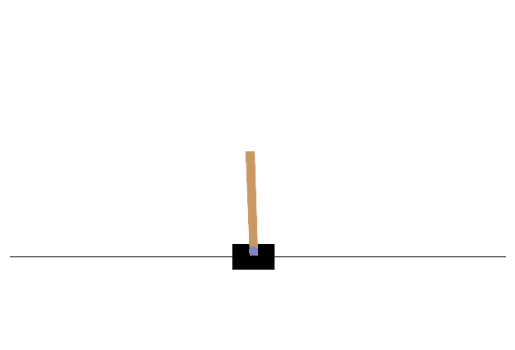

In [2]:
# Criar ambiente com modo de renderização
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Resetar ambiente
observation = env.reset()

# Executar uma ação aleatória
action = env.action_space.sample()
observation, reward, terminated, truncated, info = env.step(action)

# Tentar renderizar
try:
    img = env.render()
    plt.imshow(img)
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Erro: {e}")

# Fechar ambiente
env.close()

In [3]:
env.action_space
Discrete(2)

Discrete(2)

In [4]:
action = 1
obs, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated

In [5]:
obs

array([-0.04635585, -0.04583145, -0.03323687, -0.04035967], dtype=float32)

In [6]:
reward

1.0

In [7]:
done

False

In [8]:
info

{}

In [16]:
env = gym.make('CartPole-v1')  # Sem render para ser mais rápido

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs, info = env.reset()  # Gymnasium retorna (obs, info)
    
    for step in range(1000):
        action = basic_policy(obs)
        obs, reward, terminated, truncated, info = env.step(action)  # 5 valores!
        done = terminated or truncated
        episode_rewards += reward
        
        if done:
            break
            
    totals.append(episode_rewards)

env.close()

# Estatísticas dos resultados
print(f"Média de recompensa: {np.mean(totals):.2f}")
print(f"Desvio padrão: {np.std(totals):.2f}")
print(f"Mínimo: {np.min(totals)}")
print(f"Máximo: {np.max(totals)}")

Média de recompensa: 41.76
Desvio padrão: 9.02
Mínimo: 24.0
Máximo: 64.0


*Políticas de Rede Neural*

In [17]:
class PolicyNetwork(tf.keras.Model):
    def __init__(self, n_inputs=4, n_hidden=4, n_outputs=1):
        super(PolicyNetwork, self).__init__()
        self.hidden = tf.keras.layers.Dense(n_hidden, activation='elu',
                                           kernel_initializer='he_normal')
        self.logits = tf.keras.layers.Dense(n_outputs,
                                           kernel_initializer='he_normal')
    
    def call(self, inputs):
        hidden_out = self.hidden(inputs)
        logits_out = self.logits(hidden_out)
        return tf.nn.sigmoid(logits_out)
    
    def select_action(self, state):
        # Adiciona dimensão de batch se necessário
        if len(state.shape) == 1:
            state = tf.expand_dims(state, 0)
        
        # Calcula probabilidade de ação direita
        prob_right = self(state)
        prob_left = 1 - prob_right
        
        # Concatena probabilidades
        probabilities = tf.concat([prob_left, prob_right], axis=1)
        
        # Amostra ação
        action = tf.random.categorical(tf.math.log(probabilities), num_samples=1)
        return action.numpy()[0, 0]  # Retorna ação como escalar

# Criar e usar a rede
policy_net = PolicyNetwork()

# Exemplo de uso
sample_state = np.array([0.1, -0.2, 0.3, -0.4], dtype=np.float32)
action = policy_net.select_action(sample_state)
print(f"Ação escolhida: {action} (0=esquerda, 1=direita)")

# Verificar probabilidades
prob_right = policy_net(tf.expand_dims(sample_state, 0))
print(f"Probabilidade de ir para direita: {prob_right.numpy()[0, 0]:.3f}")



Ação escolhida: 0 (0=esquerda, 1=direita)
Probabilidade de ir para direita: 0.470


*Gradientes de política*  

In [11]:
action = tf.constant([[0], [1], [0], [1]], dtype=tf.int32)
y = 1. - tf.cast(action, tf.float32) 


In [ ]:
class SimplePGAgent:
    def __init__(self, learning_rate=0.01):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation='elu'),
            tf.keras.layers.Dense(1)  # Logits
        ])
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    def select_action(self, state):
        state = tf.expand_dims(state, 0) if len(state.shape) == 1 else state
        logits = self.model(state)
        prob = tf.nn.sigmoid(logits).numpy()[0, 0]
        return 1 if np.random.random() < prob else 0, logits
    
    def train_step(self, states, actions, rewards, discount_rate=0.95):
        # Converter para tensores
        states = tf.convert_to_tensor(states, dtype=tf.float32)
        actions = tf.convert_to_tensor(actions, dtype=tf.float32)
        
        # Calcular vantagens
        advantages = self._compute_advantages(rewards, discount_rate)
        advantages = tf.convert_to_tensor(advantages, dtype=tf.float32)
        
        with tf.GradientTape() as tape:
            # Forward pass
            logits = self.model(states)
            logits = tf.squeeze(logits, axis=-1)  # CORREÇÃO: (batch, 1) → (batch,)
            
            # Calcular loss
            loss = tf.reduce_mean(
                tf.nn.sigmoid_cross_entropy_with_logits(
                    labels=actions,  # shape (batch,)
                    logits=logits    # shape (batch,)
                ) * advantages
            )
        
        # Backward pass
        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        
        return loss.numpy()
    
    def _compute_advantages(self, rewards, discount_rate):
        discounted = np.zeros_like(rewards, dtype=np.float32)
        cumulative = 0.0
        for i in reversed(range(len(rewards))):
            cumulative = rewards[i] + discount_rate * cumulative
            discounted[i] = cumulative
        return (discounted - np.mean(discounted)) / (np.std(discounted) + 1e-7)

# Exemplo de uso rápido
def test_agent():
    agent = SimplePGAgent()
    
    # Dados de exemplo com shapes corretos
    states = np.random.randn(10, 4)  # (batch, features)
    actions = np.random.randint(0, 2, 10).astype(np.float32)  # (batch,)
    rewards = np.random.randn(10)  # (batch,)
    
    # Testar o train_step
    loss = agent.train_step(states, actions, rewards)
    print(f"Loss: {loss:.4f}")  # Deve funcionar sem erro de shape

test_agent()

Loss: 0.0322


In [ ]:
def discount_rewards(rewards, discount_rate):
    """
    Calcula recompensas descontadas (retornos).
    
    Args:
        rewards: Lista de recompensas [r0, r1, r2, ..., rT]
        discount_rate: Taxa de desconto (0-1)
    
    Returns:
        discounted_rewards: [G0, G1, G2, ..., GT]
    """
    discounted_rewards = np.empty(len(rewards))
    cumulative_rewards = 0
    
    # Percorre de trás para frente
    for step in reversed(range(len(rewards))):
        cumulative_rewards = rewards[step] + discount_rate * cumulative_rewards
        discounted_rewards[step] = cumulative_rewards
    
    return discounted_rewards

# Teste
rewards = [10, 0, -50]
discounted = discount_rewards(rewards, discount_rate=0.8)
print(f"Recompensas originais: {rewards}")
print(f"Recompensas descontadas: {discounted}")

Recompensas originais: [10, 0, -50]
Recompensas descontadas: [-22. -40. -50.]


In [ ]:
# Hiperparâmetros
n_iterations = 100
n_max_steps = 1000
n_games_per_update = 10
save_iterations = 10
discount_rate = 0.95

# Criar ambiente
env = gym.make('CartPole-v1')
n_inputs = env.observation_space.shape[0]

# Rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, kernel_initializer='he_normal')  # Logits
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Funções auxiliares
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = []
    for rewards in all_rewards:
        discounted = np.zeros_like(rewards, dtype=np.float32)
        cumulative = 0.0
        for i in reversed(range(len(rewards))):
            cumulative = rewards[i] + discount_rate * cumulative
            discounted[i] = cumulative
        all_discounted_rewards.append(discounted)
    
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    
    return [(rewards - reward_mean) / (reward_std + 1e-7) 
            for rewards in all_discounted_rewards]

def compute_loss(states, actions, advantages):
    logits = model(states)
    logits = tf.squeeze(logits, axis=-1)
    
    # Policy gradient loss
    loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            labels=tf.cast(actions, tf.float32),
            logits=logits
        ) * advantages
    )
    return loss

# Diretório para salvar modelos (formato moderno .keras)
checkpoint_dir = Path("./policy_net_checkpoints")
checkpoint_dir.mkdir(exist_ok=True)

# Loop de treinamento
for iteration in range(n_iterations):
    all_rewards = []
    all_states = []
    all_actions = []
    
    # Coletar dados de vários episódios
    for game in range(n_games_per_update):
        states, actions, rewards = [], [], []
        
        obs, info = env.reset()
        for step in range(n_max_steps):
            # Predizer ação
            state_tensor = tf.expand_dims(tf.convert_to_tensor(obs, dtype=tf.float32), 0)
            logits = model(state_tensor)
            prob_right = tf.nn.sigmoid(logits)
            action_prob = prob_right.numpy()[0, 0]
            action = 1 if np.random.random() < action_prob else 0
            
            # Executar ação
            next_obs, reward, terminated, truncated, info = env.step(action)
            
            # Armazenar dados
            states.append(obs)
            actions.append(action)
            rewards.append(reward)
            obs = next_obs
            
            if terminated or truncated:
                break
        
        all_rewards.append(rewards)
        all_states.append(states)
        all_actions.append(actions)
    
    # Calcular vantagens
    all_advantages = discount_and_normalize_rewards(all_rewards, discount_rate)
    
    # Preparar dados
    all_states_flat = np.concatenate(all_states)
    all_actions_flat = np.concatenate(all_actions)
    all_advantages_flat = np.concatenate(all_advantages)
    
    # Treinamento
    with tf.GradientTape() as tape:
        loss = compute_loss(all_states_flat, all_actions_flat, all_advantages_flat)
    
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Log e save
    if iteration % save_iterations == 0:
        avg_reward = np.mean([sum(rewards) for rewards in all_rewards])
        print(f"Iteration {iteration}: Avg Reward = {avg_reward:.2f}, Loss = {loss:.4f}")
        
        # Salvar modelo no formato moderno (.keras)
        model_path = checkpoint_dir / f"policy_net_iter_{iteration}.keras"
        model.save(model_path)
        print(f"Model saved as {model_path}")

env.close()

print("🎉 Treinamento concluído!")

Iteration 0: Avg Reward = 32.40, Loss = -0.0340
Model saved as policy_net_checkpoints\policy_net_iter_0.keras
Iteration 10: Avg Reward = 25.40, Loss = 0.0027
Model saved as policy_net_checkpoints\policy_net_iter_10.keras
Iteration 20: Avg Reward = 42.40, Loss = 0.0048
Model saved as policy_net_checkpoints\policy_net_iter_20.keras
Iteration 30: Avg Reward = 41.80, Loss = -0.0225
Model saved as policy_net_checkpoints\policy_net_iter_30.keras
Iteration 40: Avg Reward = 37.00, Loss = -0.0057
Model saved as policy_net_checkpoints\policy_net_iter_40.keras
Iteration 50: Avg Reward = 47.30, Loss = 0.0122
Model saved as policy_net_checkpoints\policy_net_iter_50.keras
Iteration 60: Avg Reward = 65.80, Loss = -0.0110
Model saved as policy_net_checkpoints\policy_net_iter_60.keras
Iteration 70: Avg Reward = 78.60, Loss = -0.0142
Model saved as policy_net_checkpoints\policy_net_iter_70.keras
Iteration 80: Avg Reward = 105.50, Loss = 0.0022
Model saved as policy_net_checkpoints\policy_net_iter_80.ker

Aprendizado de diferenças temporais e Q-learning

In [4]:
# Parâmetros do MDP
n_states = 3
n_actions = 3
discount_rate = 0.95

# Learning parameters
learning_rate0 = 0.05  # Taxa de aprendizado inicial
learning_rate_decay = 0.1
n_iterations = 20000

# Definir possible_actions (ações possíveis por estado)
# Exemplo: cada estado tem todas as ações disponíveis
possible_actions = [list(range(n_actions)) for _ in range(n_states)]

# Matriz de transições T[s, a, s'] = P(s'|s, a)
# Exemplo: transições aleatórias para demonstração
T = np.random.dirichlet(np.ones(n_states), size=(n_states, n_actions))

# Matriz de recompensas R[s, a, s'] = recompensa
# Exemplo: recompensas aleatórias entre -1 e 1
R = np.random.uniform(-1, 1, size=(n_states, n_actions, n_states))

# Inicializar Q-table com -inf para ações não possíveis
Q = np.full((n_states, n_actions), -np.inf)
for state, actions in enumerate(possible_actions):
    Q[state, actions] = 0.0  # Inicializar ações possíveis com 0

# Q-Learning
s = 0  # Estado inicial
history = []  # Para acompanhar a convergência

for iteration in range(n_iterations):
    # Escolher ação ε-greedy (exploração vs exploração)
    if np.random.random() < 0.1:  # 10% exploration
        a = np.random.choice(possible_actions[s])
    else:  # 90% exploitation
        a = np.argmax(Q[s])
    
    # Simular transição de estado
    sp = np.random.choice(range(n_states), p=T[s, a])
    reward = R[s, a, sp]
    
    # Decaimento da taxa de aprendizado
    learning_rate = learning_rate0 / (1 + iteration * learning_rate_decay)
    
    # Atualização Q-learning
    Q[s, a] = ((1 - learning_rate) * Q[s, a] + 
               learning_rate * (reward + discount_rate * np.max(Q[sp])))
    
    # Registrar para análise
    if iteration % 1000 == 0:
        history.append(Q.copy())
        print(f"Iteration {iteration}: Learning rate = {learning_rate:.4f}")
    
    # Mudar para próximo estado
    s = sp

# Resultados finais
print("\n🎯 Q-table final:")
print("Estado | Ação 0 | Ação 1 | Ação 2")
print("-" * 35)
for state in range(n_states):
    print(f"{state:6} | {Q[state, 0]:6.3f} | {Q[state, 1]:6.3f} | {Q[state, 2]:6.3f}")

print("\n🧠 Política ótima:")
for state in range(n_states):
    best_action = np.argmax(Q[state])
    print(f"Estado {state}: Melhor ação = {best_action}, Valor = {Q[state, best_action]:.3f}")

Iteration 0: Learning rate = 0.0500
Iteration 1000: Learning rate = 0.0005
Iteration 2000: Learning rate = 0.0002
Iteration 3000: Learning rate = 0.0002
Iteration 4000: Learning rate = 0.0001
Iteration 5000: Learning rate = 0.0001
Iteration 6000: Learning rate = 0.0001
Iteration 7000: Learning rate = 0.0001
Iteration 8000: Learning rate = 0.0001
Iteration 9000: Learning rate = 0.0001
Iteration 10000: Learning rate = 0.0000
Iteration 11000: Learning rate = 0.0000
Iteration 12000: Learning rate = 0.0000
Iteration 13000: Learning rate = 0.0000
Iteration 14000: Learning rate = 0.0000
Iteration 15000: Learning rate = 0.0000
Iteration 16000: Learning rate = 0.0000
Iteration 17000: Learning rate = 0.0000
Iteration 18000: Learning rate = 0.0000
Iteration 19000: Learning rate = 0.0000

🎯 Q-table final:
Estado | Ação 0 | Ação 1 | Ação 2
-----------------------------------
     0 |  0.397 |  0.042 |  0.019
     1 | -0.026 | -0.003 |  0.300
     2 | -0.042 |  0.293 | -0.043

🧠 Política ótima:
Esta

#### Exercícios:

1. Como você definiria o Aprendizado por reforço? Como ele é diferente do aprendizado regular supervisionado ou não supervisionado?

**Aprendizado por Reforço** é um tipo de aprendizado de máquina onde um agente aprende a tomar decisões através de tentativa e erro, recebendo recompensas ou punições como feedback. Diferente do aprendizado supervisionado (que usa exemplos pré-definidos com respostas corretas) e do não supervisionado (que busca padrões sem feedback), o aprendizado por reforço aprende interagindo com o ambiente e maximizando recompensas acumuladas ao longo do tempo.

Enquanto o aprendizado supervisionado precisa de um "professor" fornecendo respostas exatas, e o não supervisionado descobre estrutura sozinho, o aprendizado por reforço aprende pela experiência, como um jogador que melhora praticando e recebendo pontos por suas ações.

2. Você consegue pensar em três possíveis aplicações do RL que não foram mencionadas neste capítulo? Qual é o ambiente para cada uma delas? Qual é o agente? quais são as ações possíveis? Quais são as recompensas?

**A. Otimização de Tráfego em Tempo Real**
- **Ambiente**: Rede de semáforos de uma cidade
- **Agente**: Sistema de controle de tráfego
- **Ações**: Alterar tempos dos semáforos, priorizar vias específicas
- **Recompensas**: Redução do tempo médio de espera, aumento do fluxo de veículos

**B. Gestão Automatizada de Portfólio Financeiro**
- **Ambiente**: Mercado financeiro com ações, títulos e commodities
- **Agente**: Sistema de investimentos automatizado
- **Ações**: Comprar, vender ou manter ativos financeiros
- **Recompensas**: Maximizar retorno do portfólio, minimizar riscos

**C. Controle de Eficiência Energética em Data Centers**
- **Ambiente**: Sistema de refrigeração e servidores do data center
- **Agente**: Controlador de gestão energética
- **Ações**: Ajustar temperaturas, redistribuir cargas, gerenciar cooling
- **Recompensas**: Redução do consumo energético, manutenção da temperatura ideal

3. Qual é a taxa de desconto? A política ótima pode mudar se você modificar a taxa de desconto?

A **taxa de desconto** (γ) é um hiperparâmetro entre 0 e 1 que determina o valor presente de recompensas futuras. Valores próximos a 1 tornam o agente mais orientado a longo prazo, enquanto valores próximos a 0 focam em recompensas imediatas.

Sim, a **política ótima pode mudar** ao alterar a taxa de desconto. Uma taxa baixa prioriza recompensas imediatas, levando a políticas mais "curtas" e oportunistas. Já uma taxa alta valoriza consequências futuras, resultando em políticas mais estratégicas e de longo prazo. A escolha da taxa reflete o trade-off entre satisfação imediata e planejamento futuro.

4. Como você mede o desempenho de um agente do aprendizado por reforço?

O desempenho de um agente de aprendizado por reforço é medido principalmente pela **soma acumulada de recompensas** obtida durante os episódios de treinamento e teste. Outras métricas importantes incluem a **taxa de sucesso** (quantas vezes atingiu o objetivo), o **tempo de convergência** (quantos episódios até estabilizar o desempenho) e a **consistência** (variação do desempenho entre execuções). Em ambientes contínuos, também se avalia a **eficiência** (custo computacional por ação) e a **capacidade de generalização** para situações não vistas durante o treinamento.

5. Qual é o problema da atribuição de crédito? Quando ocorre? Como pode ser aliviado?

O **problema da atribuição de crédito** ocorre quando um agente recebe uma recompensa após uma sequência de ações e precisa determinar quais ações específicas contribuíram para esse resultado. Este problema é comum em tarefas com recompensas esparsas ou atrasadas, onde o feedback não é imediato.

Pode ser aliviado através de métodos como **Discounting** (valorizando recompensas imediatas), **Eligibility Traces** (rastreando contribuições de ações recentes) e **Reward Shaping** (fornecendo recompensas intermediárias artificiais para guiar o aprendizado). Algoritmos como **Actor-Critic** também ajudam ao separar a avaliação de valores da seleção de ações.

6. Qual é o objetivo de utilizar uma memória de repetição?

A **memória de repetição** (replay buffer) é utilizada para armazenar experiências passadas do agente (estado, ação, recompensa, próximo estado), permitindo o reaproveitamento dessas experiências em treinamentos futuros. Seu objetivo principal é **quebrar correlações temporais** entre experiências sequenciais, aumentar a **eficiência de amostragem** e **estabilizar o treinamento** ao permitir que o agente aprenda repetidamente com experiências diversificadas, incluindo tanto sucessos quanto fracassos passados.

7. O que é um algoritmo de RL off-policy?

Um algoritmo **off-policy** é um método de aprendizado por reforço onde o agente aprende sobre uma política ótima (política alvo) enquanto segue uma política diferente de exploração (política comportamental). Isso permite aprender com experiências passadas geradas por políticas diferentes, reutilizar dados de forma mais eficiente e explorar o ambiente sem comprometer o aprendizado da política ideal. Exemplos comuns incluem Q-Learning e DQN.

8. Utilize gradientes de políticas para enfrentar o "BypedalWalker-v2" da OpenAI gym.

9. Utilize o algoritmo DQN para treinar um agente para jogar Pong, o famoso jogo do atari(Pong-v0 no OpenAI gym). Cuidado: uma observação individual é insuficiente para dizer a direção e a velocidade da bola.